# **importing libraries**

In [85]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

# **Data acquisition of the movie dataset**

**movie**

In [17]:
df_movie=pd.read_csv('/content/movies.dat',sep = '::',engine='python',encoding='latin-1')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [86]:
df_movie.shape

(3882, 3)

In [87]:
df_movie.describe()

,MovieIDs
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


**rating**

In [18]:
df_rating = pd.read_csv("/content/ratings.dat",sep='::', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3.0,978302109.0
1,1,914,3.0,978301968.0
2,1,3408,4.0,978300275.0
3,1,2355,5.0,978824291.0
4,1,1197,3.0,978302268.0


In [88]:
df_rating.shape

(260829, 4)

In [89]:
df_rating.describe()

,ID,MovieID,Ratings,TimeStamp
count,260829.000000,260829.000000,260829.000000,2.608290e+05
mean,821.904290,1878.718072,3.560202,9.788805e+08
std,448.945666,1108.702901,1.128263,1.040998e+07
min,1.000000,1.000000,1.000000,9.747334e+08
25%,438.000000,1029.000000,3.000000,9.749775e+08
50%,846.000000,1869.000000,4.000000,9.757810e+08
75%,1203.000000,2793.000000,4.000000,9.770289e+08
max,1594.000000,3952.000000,5.000000,1.046389e+09


**user**

In [19]:
df_user = pd.read_csv("/content/users.dat",sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [90]:
df_user.shape

(6039, 5)

In [91]:
df_user.describe()

,UserID,Age,Occupation
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


# concatenating the above datasets

In [84]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3.0,978302109.0,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3.0,978301968.0,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4.0,978300275.0,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5.0,978824291.0,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3.0,978302268.0,6.0,F,50.0,9.0,55117


In [92]:
df.shape

(260829, 12)

# **Perform the Exploratory Data Analysis (EDA) for the users dataset**

<Axes: xlabel='Age', ylabel='count'>

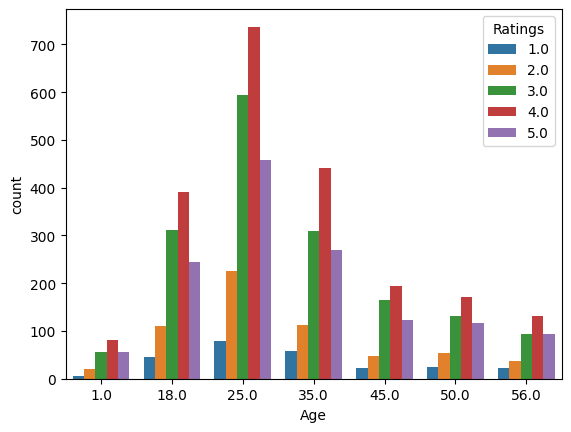

In [94]:
sns.countplot(x=df['Age'],hue=df['Ratings'] )

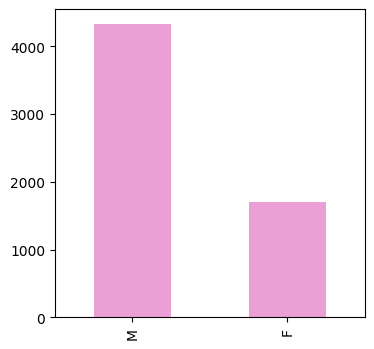

In [109]:
base_color = sns.color_palette()[6]
df['Gender'].value_counts().plot(kind='bar',alpha=0.7,figsize=(4,4),color=base_color,)
plt.show()

Text(0.5, 0, 'Age')

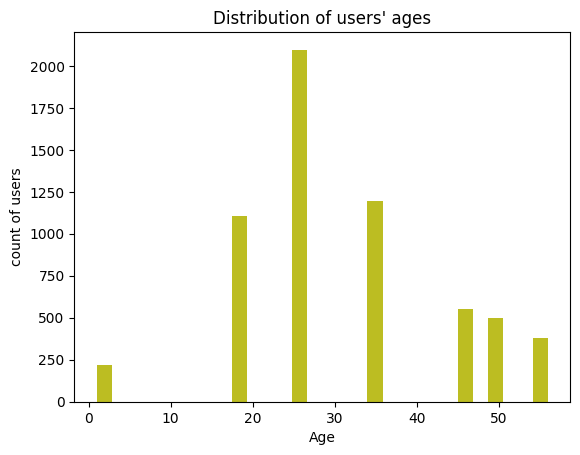

In [32]:
base_color = sns.color_palette()[8]
df.Age.plot.hist(bins=30,color = base_color)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

Text(0, 0.5, 'Rating')

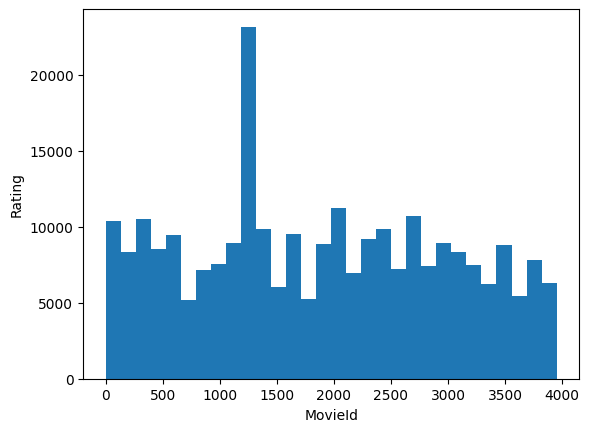

In [105]:
df['MovieID'].plot.hist(bins=30)
plt.xlabel("MovieId")
plt.ylabel("Rating")


In [37]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90-99',]
df['age_group'] = pd.cut(df.Age, range(0,101, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]


,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


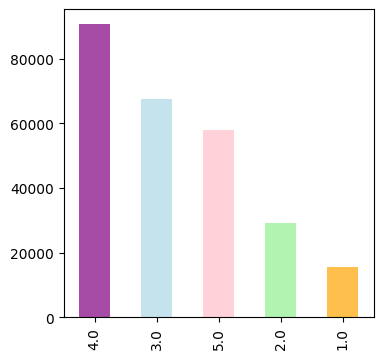

In [108]:
base_color = ['purple','lightblue','pink','lightgreen','orange']
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(4,4),color=base_color,)
plt.show()

In [49]:
movies = df.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


In [50]:
ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 13)

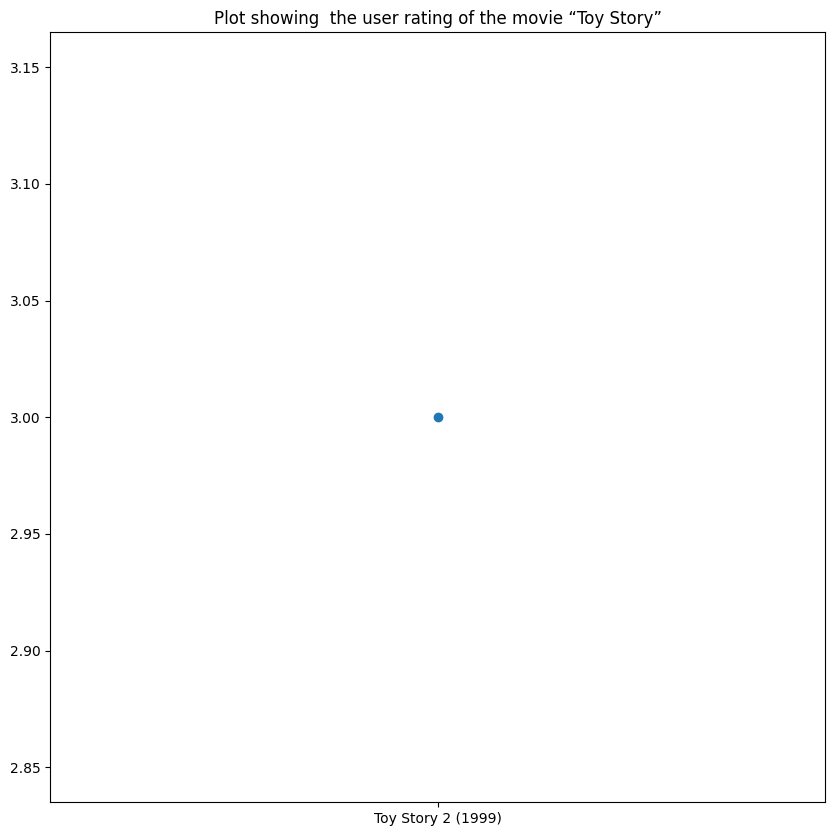

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['MovieName'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()

In [52]:
ToyStory_data[['MovieName','age_group']]

,MovieName,age_group
3044,Toy Story 2 (1999),0-9


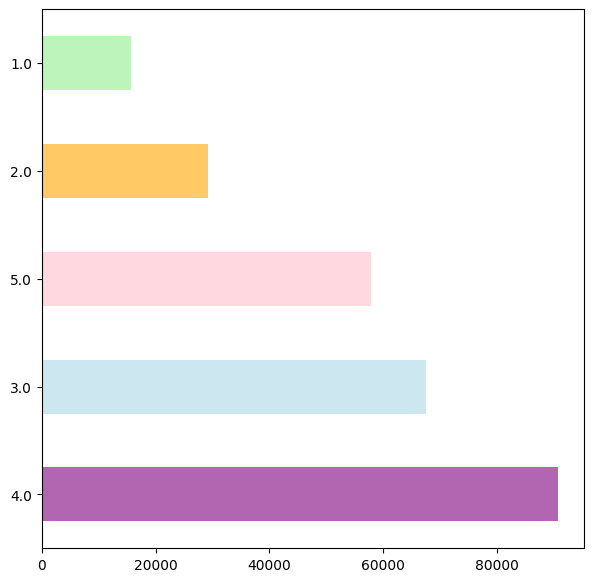

In [53]:
top_10 = df[10:]
top_10['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7),color=colors)
plt.show()

In [115]:
userid_45= groupedby_uid.get_group(45)
userid_45[['UserID','Ratings']]

,UserID,Ratings
43,45.0,4.0


Text(0.5, 0, 'Ratings')

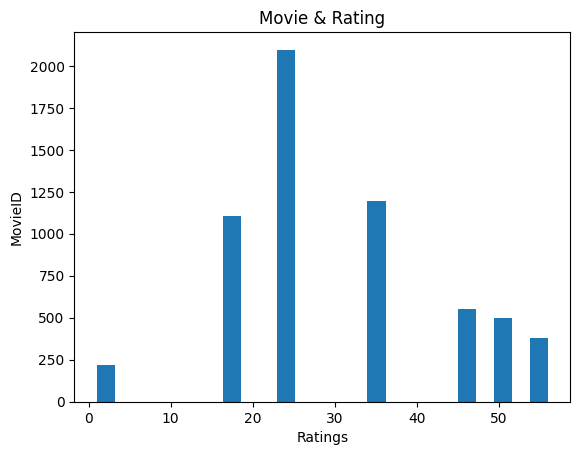

In [63]:
df.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

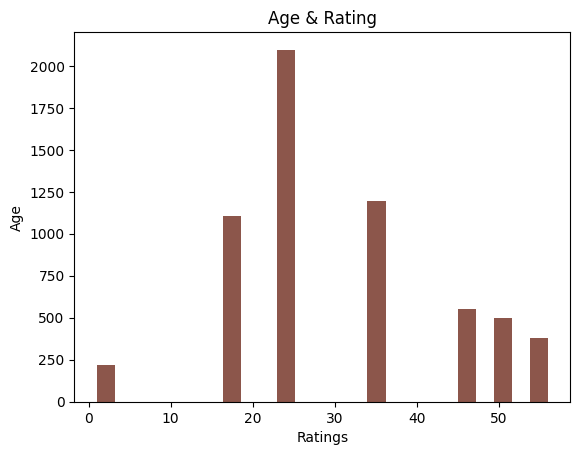

In [65]:
base_color = sns.color_palette()[5]
df.Age.plot.hist(bins=25,color=base_color)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

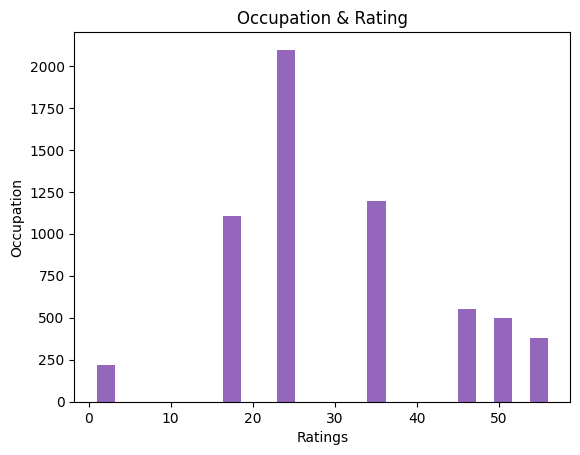

In [66]:
base_color = sns.color_palette()[4]
df.Age.plot.hist(bins=25,color=base_color)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [116]:
first_500 = df[500:]
first_500.dropna(inplace=True)

<ipython-input-116-47ead3a1e407>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


In [117]:
features = first_500[['MovieID','Age','Occupation']].values

labels = first_500[['Ratings']].values

train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [122]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

98.54

In [121]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


57.75

In [123]:
perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28.61

In [124]:
gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


32.23

In [126]:
logreg = LogisticRegression()
logreg.fit(train, train_labels.ravel())
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


32.76

In [127]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression',
               'Naive Bayes', 'Perceptron',
              'Decision Tree'],
    'Score': [acc_knn, acc_log,
               acc_gaussian, acc_perceptron,
                acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,98.54
0,KNN,57.75
1,Logistic Regression,32.76
2,Naive Bayes,32.23
3,Perceptron,28.61
